## TextBlob: Simplified Text Preprocessing

TextBlob is a Python library for processing textual data. Why the simple api for diving into common NLP tasks such as part of speech tagging, noun pronounce extractions, sentiment analysis, classification, translation and more.

In [701]:
from textblob import TextBlob

### 1. Lowercasing and Uppercasing
Convert all characters in the text to lowercase/uppercase.

In [704]:
text = "TEXT preprocessing is an IMPORTANT step in NLP! It cleans and organizes data for better machine learning results."

In [706]:
blob = TextBlob(text.upper())
print(blob)

TEXT PREPROCESSING IS AN IMPORTANT STEP IN NLP! IT CLEANS AND ORGANIZES DATA FOR BETTER MACHINE LEARNING RESULTS.


In [708]:
blob = TextBlob(text.lower())
print(blob)

text preprocessing is an important step in nlp! it cleans and organizes data for better machine learning results.


In [710]:
# Textblobs are like strings in Python.
blob[0:10]

TextBlob("text prepr")

### 2. Tokenization
Split text into smaller components, typically words or subwords (tokens).

In [713]:
tokens = blob.words
print(tokens)

['text', 'preprocessing', 'is', 'an', 'important', 'step', 'in', 'nlp', 'it', 'cleans', 'and', 'organizes', 'data', 'for', 'better', 'machine', 'learning', 'results']


In [715]:
print(blob.sentences)

[Sentence("text preprocessing is an important step in nlp!"), Sentence("it cleans and organizes data for better machine learning results.")]


### 3. Lemmatization
(TextBlob doesn't support stemming)

Convert words to their base or dictionary form (lemma).

In [718]:
from textblob import Word

In [720]:
q = Word("Apples")
q.lemmatize()

'Apples'

In [722]:
q = Word("coming")
q.lemmatize("v") # Pass in WordNet part of speech("verb")

'come'

In [724]:
# Another method
lemma = [word.lemmatize() for word in blob.words]
print(lemma)

['text', 'preprocessing', 'is', 'an', 'important', 'step', 'in', 'nlp', 'it', 'clean', 'and', 'organizes', 'data', 'for', 'better', 'machine', 'learning', 'result']


### 4. Part of Speech (POS) Tagging
Assign grammatical tags (e.g., noun, verb) to each word.

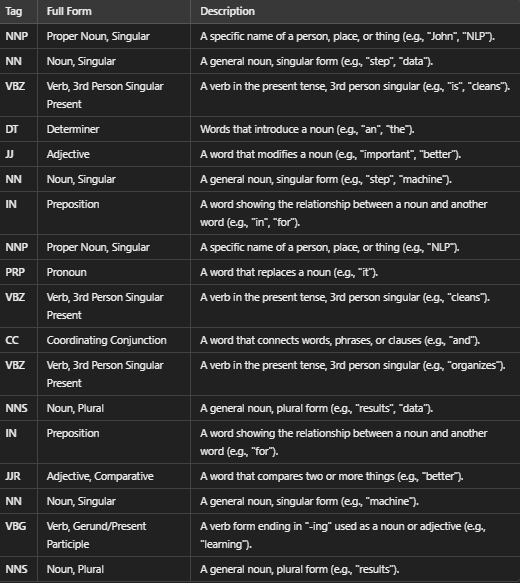

In [728]:
blob = TextBlob(text)
blob.tags

[('TEXT', 'NNP'),
 ('preprocessing', 'NN'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('IMPORTANT', 'JJ'),
 ('step', 'NN'),
 ('in', 'IN'),
 ('NLP', 'NNP'),
 ('It', 'PRP'),
 ('cleans', 'VBZ'),
 ('and', 'CC'),
 ('organizes', 'VBZ'),
 ('data', 'NNS'),
 ('for', 'IN'),
 ('better', 'JJR'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('results', 'NNS')]

### 5. Spelling Correction
Automatically correct misspelled words.

In [625]:
string = " It is a sonny day today"

blob = TextBlob(string.lower())

In [627]:
spell_check = blob.correct()
print(spell_check)

 it is a sunny day today


## Features of TextBlob

### 1. Noun Phrase Extraction
Extract noun phrases from text. Noun phrases are groups of words that act as a noun.

In [632]:
text1 = "The beautiful park near the river is a perfect picnic spot."
blob = TextBlob(text1)

In [634]:
print(blob.noun_phrases)

['beautiful park', 'perfect picnic spot']


### 2. Part-of-Speech Tagging
Identify the grammatical role of each word.

In [637]:
print(blob.tags)

[('The', 'DT'), ('beautiful', 'JJ'), ('park', 'NN'), ('near', 'IN'), ('the', 'DT'), ('river', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('perfect', 'JJ'), ('picnic', 'JJ'), ('spot', 'NN')]


### 3. Sentiment Analysis
Analyze the sentiment (polarity and subjectivity) of text.

In [640]:
print(blob.sentiment, "\n")

Sentiment(polarity=0.65, subjectivity=0.7999999999999999) 



### 4. Language Translation and Detection
Translate and detect the language of a text.

In [643]:
text = TextBlob("Bonjour tout le monde")
print(text.detect_language())
print(text.translate(to="en"))

AttributeError: 'TextBlob' object has no attribute 'detect_language'

### 5. WordLists
Find out which words are in the sentence and ignore spaces between them.

In [646]:
animals = TextBlob("cow sheep crow")
animals.words

WordList(['cow', 'sheep', 'crow'])

### 6. Word and Phrase Frequencies
Count word occurrences.

In [649]:
from collections import Counter

In [651]:
blob = TextBlob("the day is passing by very slowly. it is hard to pass time. the day feels long.")
words = blob.words
freq = Counter(words)
freq

Counter({'the': 2,
         'day': 2,
         'is': 2,
         'passing': 1,
         'by': 1,
         'very': 1,
         'slowly': 1,
         'it': 1,
         'hard': 1,
         'to': 1,
         'pass': 1,
         'time': 1,
         'feels': 1,
         'long': 1})

In [653]:
# Methods to count frequency of word in a sentence.
blob.word_counts['day']

2

In [655]:
# Another method to count frequency of word in a sentence.
blob.words.count('day')

2

In [657]:
# Case sensitive method to search word in a sentence.  (default is False)
blob.words.count('day', case_sensitive=True)

2

### 7. n-grams
Extract consecutive sequences of n words.

In [660]:
seq = list(blob.ngrams(5))
seq

[WordList(['the', 'day', 'is', 'passing', 'by']),
 WordList(['day', 'is', 'passing', 'by', 'very']),
 WordList(['is', 'passing', 'by', 'very', 'slowly']),
 WordList(['passing', 'by', 'very', 'slowly', 'it']),
 WordList(['by', 'very', 'slowly', 'it', 'is']),
 WordList(['very', 'slowly', 'it', 'is', 'hard']),
 WordList(['slowly', 'it', 'is', 'hard', 'to']),
 WordList(['it', 'is', 'hard', 'to', 'pass']),
 WordList(['is', 'hard', 'to', 'pass', 'time']),
 WordList(['hard', 'to', 'pass', 'time', 'the']),
 WordList(['to', 'pass', 'time', 'the', 'day']),
 WordList(['pass', 'time', 'the', 'day', 'feels']),
 WordList(['time', 'the', 'day', 'feels', 'long'])]

In [662]:
# Another method
seq = (blob.ngrams(2))
seq

[WordList(['the', 'day']),
 WordList(['day', 'is']),
 WordList(['is', 'passing']),
 WordList(['passing', 'by']),
 WordList(['by', 'very']),
 WordList(['very', 'slowly']),
 WordList(['slowly', 'it']),
 WordList(['it', 'is']),
 WordList(['is', 'hard']),
 WordList(['hard', 'to']),
 WordList(['to', 'pass']),
 WordList(['pass', 'time']),
 WordList(['time', 'the']),
 WordList(['the', 'day']),
 WordList(['day', 'feels']),
 WordList(['feels', 'long'])]

### 8. Word Inflection 
Handle pluralization and singularization.

In [665]:
word1 = TextBlob("dogs are eating rotis.")
print(word1.words)
print(word1.words[0:4].singularize())

['dogs', 'are', 'eating', 'rotis']
['dog', 'are', 'eating', 'roti']


In [667]:
word2 = TextBlob("dog is eating roti.")
print(word2.words[0:4].pluralize())

['dogs', 'iss', 'eatings', 'rotis']


### 9. WordNet Integration
Access synonyms, antonyms, and definitions.

In [670]:
# pip install nltk
from textblob.wordnet import Synset

In [672]:
# definitions
synset1 = Synset('car.n.01')
synset1.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [674]:
synset2 = Synset('country.n.01')
synset2.definition()

'a politically organized body of people under a single government'

In [676]:
# Check similarity between both
synset1.path_similarity(synset2)

0.05555555555555555

In [678]:
#synonyms
print("Synonyms:", [lemma.name() for lemma in synset.lemmas()])

Synonyms: ['queen']
